In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/daniel/Library/CloudStorage/OneDrive-Persönlich/00 Synology/01 Dokumente/2023 Docs/99 CareerFoundry/06 Advanced Analytics'

In [4]:
citi = pd.read_csv(os.path.join(path, '01 Data', 'citi_clean.csv'))

In [6]:
citi.shape

(43019, 18)

In [7]:
citi.head(2)

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1


In [8]:
citi.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [9]:
citi.dtypes

trip_id                     object
bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender                       int64
dtype: object

In [37]:
numerical_columns = ['start_hour', 'start_station_latitude', 'start_station_longitude',
                     'end_station_latitude', 'end_station_longitude', 'trip_duration', 'birth_year']

citi_num = citi[numerical_columns].copy()


In [38]:
citi_num.shape

(43019, 7)

## Elbow technique

In [39]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [40]:
score = [kmeans[i].fit(citi_num).score(citi_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/daniel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/daniel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/daniel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/daniel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/daniel/an

[-11793331083.989613,
 -3837516228.468895,
 -1872108544.2340722,
 -1093901056.5851223,
 -711215516.3425854,
 -493749233.45233005,
 -363205848.9556174,
 -280543184.2939162,
 -222575413.91361237]

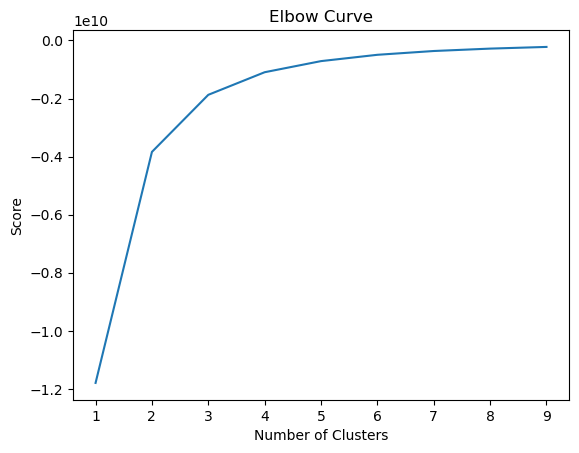

In [41]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## k-means clustering

In [42]:
# Create the k-means object.

#kmeans = KMeans(n_clusters = 3, n_jobs = -1) getting an error for n_jobs -- trying without it
kmeans = KMeans(n_clusters = 4)

In [43]:
# Fit the k-means object to the data.

# corrected the code to "kmeans"
kmeans.fit(citi_num)

/Users/daniel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [44]:
citi_num['clusters'] = kmeans.fit_predict(citi_num)

/Users/daniel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
citi_num.head()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year,clusters
0,18,40.754666,-73.991382,40.742388,-73.997262,993,1968.0,0
1,18,40.719392,-74.002472,40.728419,-73.987140,581,1983.0,0
2,19,40.760193,-73.991255,40.768254,-73.988639,361,1989.0,2
3,11,40.743156,-73.974347,40.756014,-73.967416,561,1988.0,2
4,22,40.730287,-73.990765,40.726218,-73.983799,427,1986.0,2


In [46]:
citi_num['clusters'].value_counts()

2    19787
0    13826
1     6862
3     2544
Name: clusters, dtype: int64

### Start Latitude vs Longitude

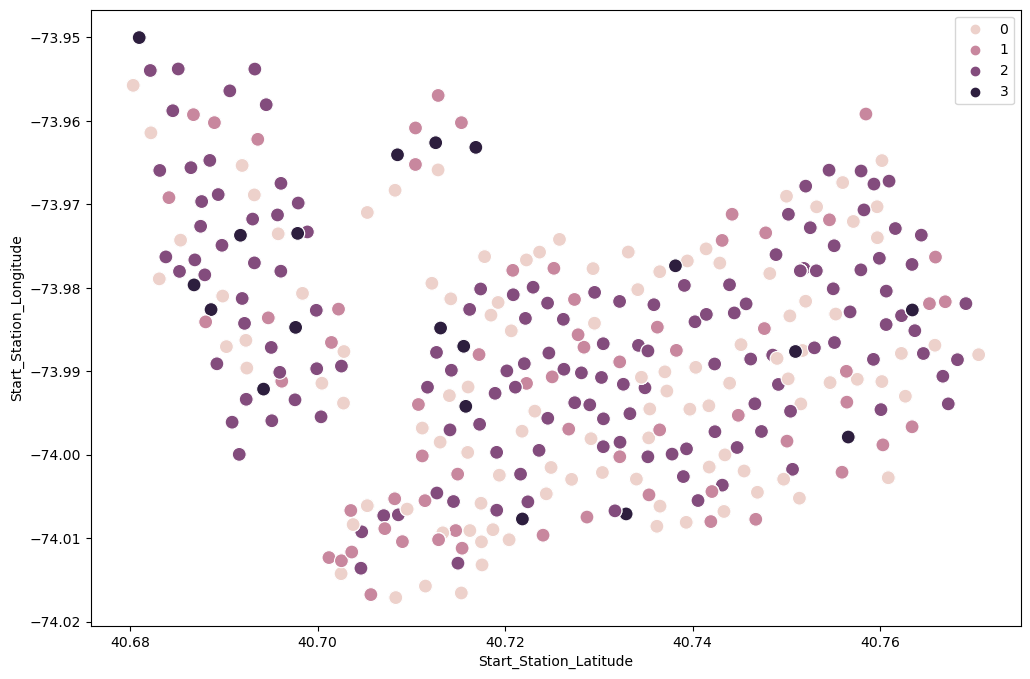

In [47]:
# Plot the clusters for the "start_station_latitude" and "start_station_longitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=citi_num['start_station_latitude'], y=citi_num['start_station_longitude'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start_Station_Latitude') # Label x-axis.
plt.ylabel('Start_Station_Longitude') # Label y-axis.
plt.show()

### End Latitude vs Longitude

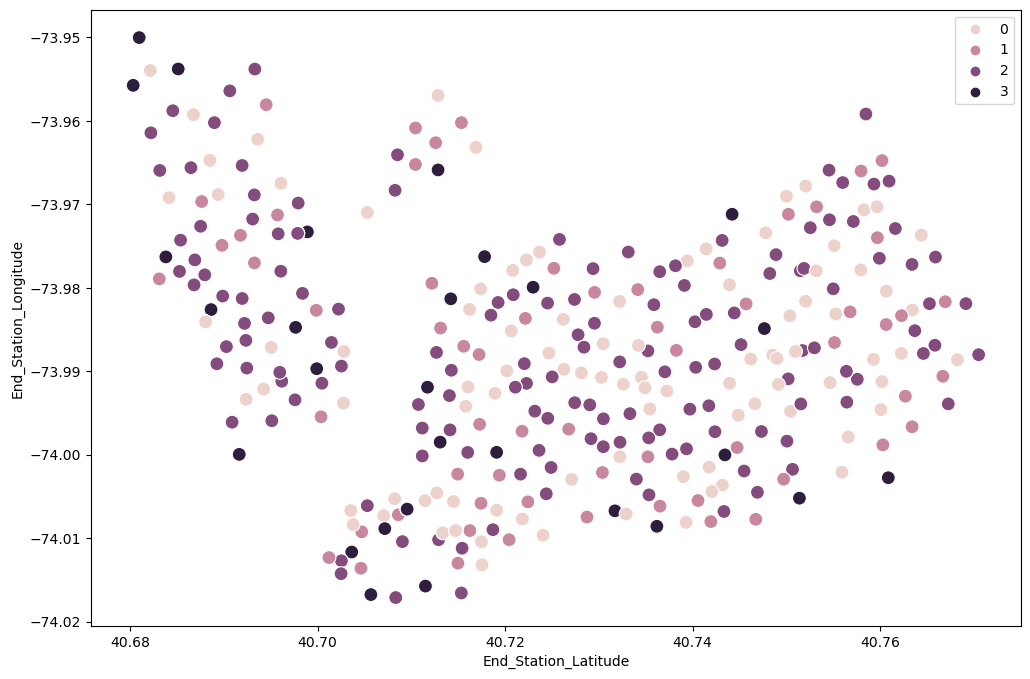

In [48]:
# Plot the clusters for the "end_station_latitude" and "end_station_longitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=citi_num['end_station_latitude'], y=citi_num['end_station_longitude'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('End_Station_Latitude') # Label x-axis.
plt.ylabel('End_Station_Longitude') # Label y-axis.
plt.show()

### Latitude: Start_Station / End-Station

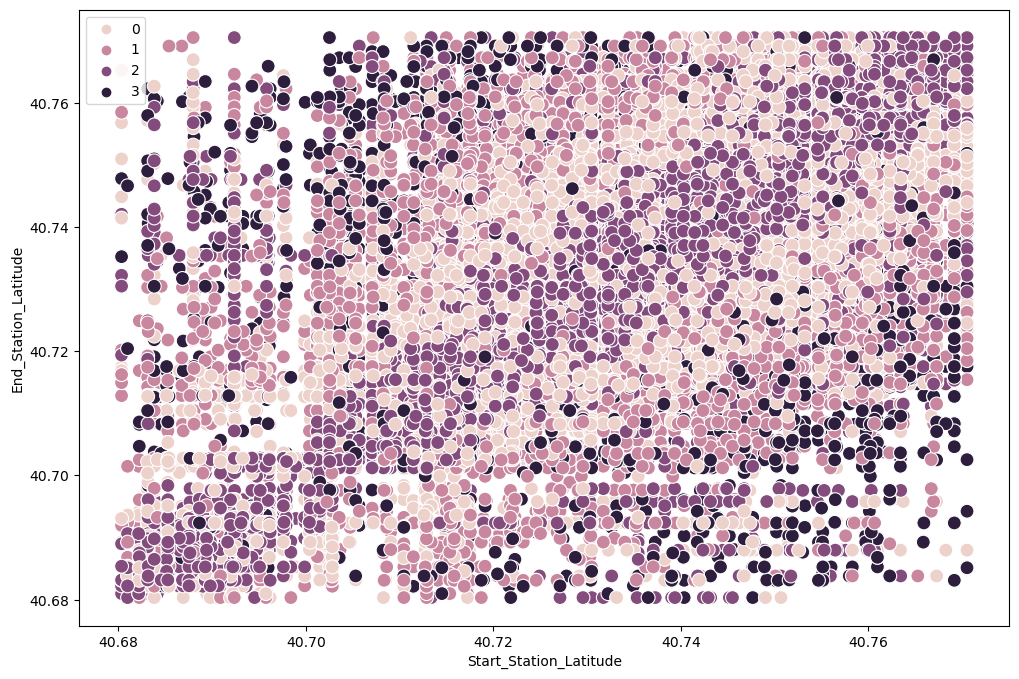

In [49]:
# Plot the clusters for the "start_station_latitude" and "end_station_latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=citi_num['start_station_latitude'], y=citi_num['end_station_latitude'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start_Station_Latitude') # Label x-axis.
plt.ylabel('End_Station_Latitude') # Label y-axis.
plt.show()

### Longitude: Start/Station / End-Station

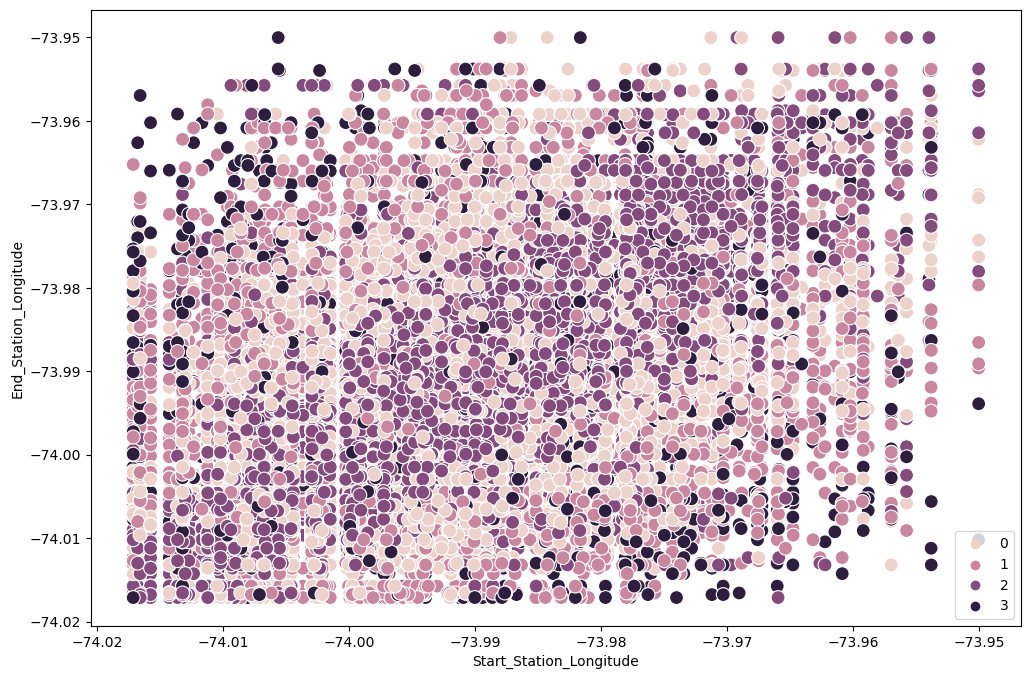

In [50]:
# Plot the clusters for the "start_station_longitude" and "end_station_longitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=citi_num['start_station_longitude'], y=citi_num['end_station_longitude'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start_Station_Longitude') # Label x-axis.
plt.ylabel('End_Station_Longitude') # Label y-axis.
plt.show()

In [56]:
citi_num.loc[citi_num['clusters'] == 3, 'cluster'] = 'dark purple'
citi_num.loc[citi_num['clusters'] == 2, 'cluster'] = 'purple'
citi_num.loc[citi_num['clusters'] == 1, 'cluster'] = 'grey pink'
citi_num.loc[citi_num['clusters'] == 0, 'cluster'] = 'pink'

In [52]:
citi_num.columns

Index(['start_hour', 'start_station_latitude', 'start_station_longitude',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'birth_year', 'clusters', 'cluster'],
      dtype='object')

In [57]:
citi_num.groupby('cluster').agg({'start_hour':['mean', 'median'], 
                         'start_station_latitude':['mean', 'median'], 
                         'start_station_longitude':['mean', 'median'],
                          'end_station_latitude':['mean', 'median'],
                           'end_station_longitude':['mean', 'median'],
                           'trip_duration':['mean', 'median'],
                           'birth_year':['mean', 'median']
                          })

start_hour        start_station_latitude             \
                  mean median                   mean     median   
cluster                                                           
dark purple  14.588836   16.0              40.732509  40.734546   
grey pink    14.477995   16.0              40.733012  40.734232   
pink         14.088529   15.0              40.735920  40.737262   
purple       13.880578   14.0              40.734228  40.736197   

            start_station_longitude            end_station_latitude  \
                               mean     median                 mean   
cluster                                                               
dark purple              -73.991111 -73.990765            40.730280   
grey pink                -73.991341 -73.991382            40.731821   
pink                     -73.990587 -73.990741            40.735773   
purple                   -73.991051 -73.990765            40.734144   

                       end_station_longitude            trip_duration          \
                median                  mean     median          mean  median   
cluster                                                                         
dark purple  40.730386            -73.991200 -73.990958   2202.425708  2128.0   
grey pink    40.731724            -73.991841 -73.991908   1353.903527  1323.0   
pink         40.737050            -73.990838 -73.990765    788.221322   770.0   
purple       40.736245            -73.991330 -73.990985    371.933340   377.0   

              birth_year          
                    mean  median  
cluster                           
dark purple  1974.380503  1977.0  
grey pink    1975.003060  1977.0  
pink         1975.578331  1978.0  
purple       1976.041846  1978.0

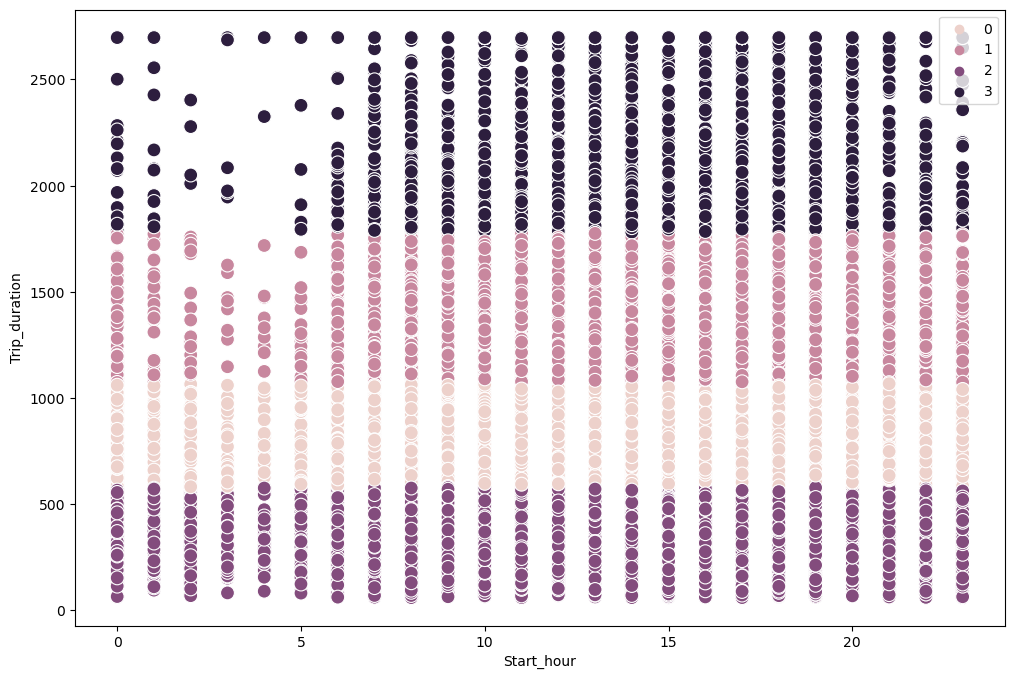

In [58]:
# Plot the clusters for the "start_hour" and "trip_duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=citi_num['start_hour'], y=citi_num['trip_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start_hour') # Label x-axis.
plt.ylabel('Trip_duration') # Label y-axis.
plt.show()

There are 4 cluster in trip duration. During the Early morning hours, the medium to long trips are considerably less. 

We will analyze the 4 trip_duration cluster.
 
 1.  "short trips": up to 600
 2. "medium trips": 600-1200
 3. "long trips": 1200-1800
 4. "very long trips": >1800

In [67]:
# Create a new column 'trip_duration_cluster'
citi['trip_duration_cluster'] = pd.cut(citi['trip_duration'],
                                       bins=[0, 600, 1200, 1800, np.inf],
                                       labels=['short trips', 'medium trips', 'long trips', 'very long trips'])

# Group by 'trip_duration_cluster' and count the number of trips
grouped_df = citi.groupby('start_hour')['trip_duration_cluster'].count().reset_index()


In [69]:
grouped_df = citi.groupby(['start_hour', 'trip_duration_cluster'])['trip_id'].count().reset_index()


In [70]:
grouped_df

,start_hour,trip_duration_cluster,trip_id
0,0,short trips,211
1,0,medium trips,141
2,0,long trips,46
3,0,very long trips,22
4,1,short trips,146
...,...,...,...
91,22,very long trips,65
92,23,short trips,398
93,23,medium trips,282
94,23,long trips,97


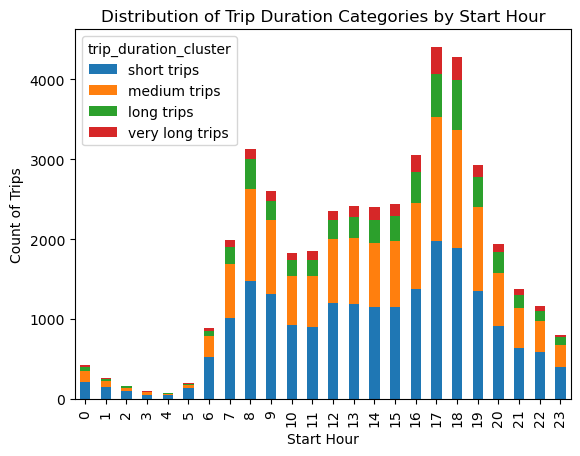

In [71]:

# Group by 'start_hour' and 'trip_duration_cluster' and count the number of trips
grouped_df = citi.groupby(['start_hour', 'trip_duration_cluster'])['trip_id'].count().unstack()

# Plot the stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Start Hour')
plt.ylabel('Count of Trips')
plt.title('Distribution of Trip Duration Categories by Start Hour')

# Display the chart
plt.show()